In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('email_classification.csv')

In [6]:
# Check column names to verify the presence of 'email' and 'label'
print("Columns in the DataFrame:", df.columns)

Columns in the DataFrame: Index(['email', 'label', 'text'], dtype='object')


In [7]:
# Check for missing columns
if 'email' in df.columns and 'label' in df.columns:
    # Use 'email' column directly for text analysis
    X = df['email'].fillna('')
    y = df['label']
else:
    raise KeyError("Column 'email' or 'label' not found in the DataFrame.")

In [8]:
# Print the first few rows to verify data loading and preprocessing
print("\nFirst few rows of the DataFrame:")
print(df.head())


First few rows of the DataFrame:
                                               email label  \
0  Upgrade to our premium plan for exclusive acce...   ham   
1  Happy holidays from our team! Wishing you joy ...   ham   
2  We're hiring! Check out our career opportuniti...   ham   
3  Your Amazon account has been locked. Click her...  spam   
4  Your opinion matters! Take our survey and help...   ham   

                                                text  
0  Upgrade to our premium plan for exclusive acce...  
1  Happy holidays from our team! Wishing you joy ...  
2  We're hiring! Check out our career opportuniti...  
3  Your Amazon account has been locked. Click her...  
4  Your opinion matters! Take our survey and help...  


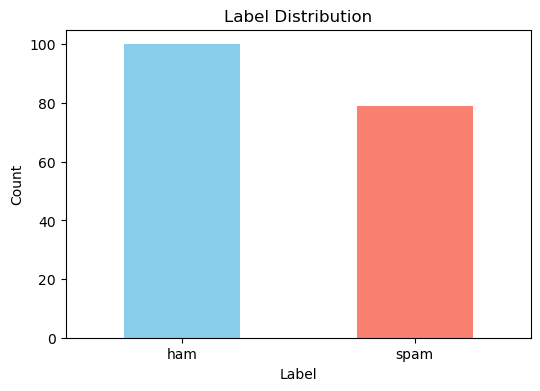

In [9]:
# Plot histogram of label distribution
plt.figure(figsize=(6, 4))
df['label'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [10]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [11]:
# Initialize the model
model = MultinomialNB()

# Train the model on the TF-IDF transformed training data
model.fit(X_train_tfidf, y_train)

# Make predictions on the TF-IDF transformed test data
y_pred = model.predict(X_test_tfidf)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

         ham       1.00      1.00      1.00        14
        spam       1.00      1.00      1.00        22

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



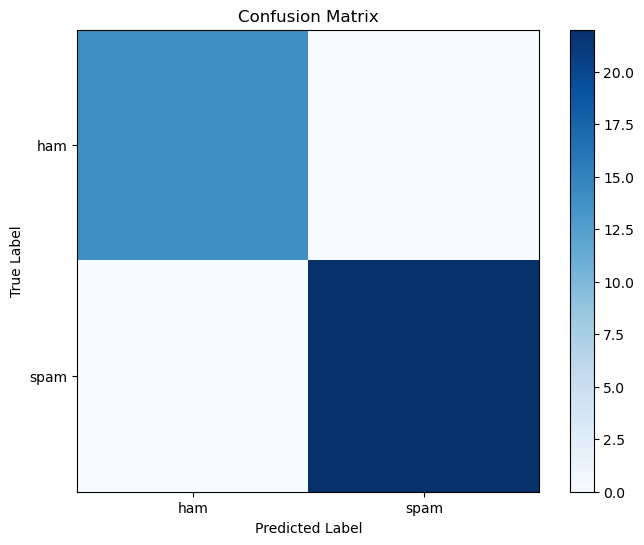

In [12]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = [0, 1]  # Assuming binary classification (ham, spam)
plt.xticks(tick_marks, ['ham', 'spam'])
plt.yticks(tick_marks, ['ham', 'spam'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()